In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [2]:
tqdm.pandas()

# Veith CYP1A2

Original data source is https://pmc.ncbi.nlm.nih.gov/articles/PMC2783980/

Curated by TDC @ https://tdcommons.ai/single_pred_tasks/adme#cyp-p450-1A2-inhibition-veith-et-al

We will pull directly from TDC, with the description on TDC given below

"""

Dataset Description: The CYP P450 genes are involved in the formation and breakdown (metabolism) of various molecules and chemicals within cells. Specifically, CYP1A2 localizes to the endoplasmic reticulum and its expression is induced by some polycyclic aromatic hydrocarbons (PAHs), some of which are found in cigarette smoke. It is able to metabolize some PAHs to carcinogenic intermediates. Other xenobiotic substrates for this enzyme include caffeine, aflatoxin B1, and acetaminophen.

Task Description: Binary Classification. Given a drug SMILES string, predict CYP1A2 inhibition.

Dataset Statistics: 12,579 drugs.


"""

## Assay info

Based on a P450 GLO system

In [3]:
from tdc.single_pred import ADME
data = ADME(name = 'CYP1A2_Veith')


Downloading...
100%|██████████| 760k/760k [00:00<00:00, 6.12MiB/s]
Loading...
Done!


In [4]:
df = data.get_data()
df.head()

Drug_ID                                               Drug  Y
0  6602638.0             CCCC(=O)Nc1ccc(N2CCN(CC)CC2)c(Cl)c1.Cl  0
1   644510.0  O=c1[nH]c2cc3c(cc2cc1CN(CCCO)Cc1nnnn1Cc1ccc(F)...  1
2  1960010.0       CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21  1
3   644675.0         CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1  1
4   644851.0                   Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1  1

<Axes: xlabel='Y', ylabel='count'>

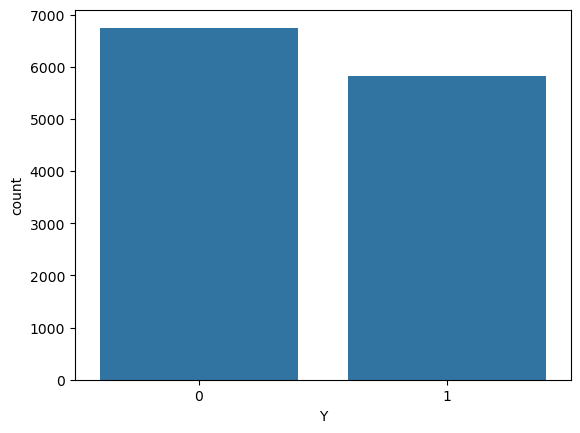

In [5]:
sns.countplot(data=df, x="Y")

In [6]:
df.rename(columns={"Drug": "SMILES", "Y":"Active", "Drug_ID":"PubChemCID"}, inplace=True)

In [7]:
import mols2grid
mols2grid.display(df)

MolGridWidget()

In [12]:
from utils.utils import standardize_smiles
with BlockLogs():
    df["CANONICAL_SMILES"] = df["SMILES"].progress_apply(lambda x: standardize_smiles(x))

100%|██████████| 12579/12579 [01:24<00:00, 148.59it/s]


In [13]:
from utils.utils import smi_to_inchikey
# compute inchikeys
with BlockLogs():
    df["INCHIKEY"] = df["CANONICAL_SMILES"].progress_apply(lambda x: smi_to_inchikey(x))

100%|██████████| 12579/12579 [00:02<00:00, 4985.86it/s]


In [14]:
df.INCHIKEY.isna().sum() # everything worked

3

In [15]:
df.head()

PubChemCID                                             SMILES  Active  \
0   6602638.0             CCCC(=O)Nc1ccc(N2CCN(CC)CC2)c(Cl)c1.Cl       0   
1    644510.0  O=c1[nH]c2cc3c(cc2cc1CN(CCCO)Cc1nnnn1Cc1ccc(F)...       1   
2   1960010.0       CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21       1   
3    644675.0         CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1       1   
4    644851.0                   Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1       1   

                                    CANONICAL_SMILES  \
0                CCCC(=O)Nc1ccc(N2CCN(CC)CC2)c(Cl)c1   
1  O=c1[nH]c2cc3c(cc2cc1CN(CCCO)Cc1nnnn1Cc1ccc(F)...   
2       CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21   
3         CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1   
4                   Clc1ccccc1-c1n[nH]c(-c2ccccc2)n1   

                      INCHIKEY  
0  ULLDFBZUOXJYID-UHFFFAOYSA-N  
1  VTLXYSNKFGEFDQ-UHFFFAOYSA-N  
2  JNCIAHUGNMSHOQ-YPKPFQOOSA-N  
3  GEUQHFHLRHDTPU-UHFFFAOYSA-N  
4  AHWJVKKSEVAPMR-UHFFFAOYSA-N

In [16]:
df["dataset"] = "veith_2009"
df["data_type"] = "assay"
df["common_name"] = pd.NA
df["action_type"] = "inhibitor"
df.to_csv("processed/veith_2009.csv", index=False)